In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as stats
import scipy.stats as st

In [2]:
df=pd.read_csv('data (1) (1).csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [7]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [8]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [9]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

<AxesSubplot:title={'center':'Number of house in each city'}, xlabel='count', ylabel='city'>

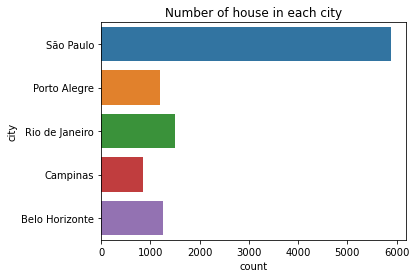

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Number of house in each city")
sb.countplot(data=df,y="city")

In [11]:
avg_cost=pd.DataFrame(df.groupby(by='city')['hoa (R$)'].mean())

In [12]:
avg_cost.reset_index(inplace=True)


In [13]:
avg_cost

,city,hoa (R$)
0,Belo Horizonte,2324.197138
1,Campinas,628.922626
2,Porto Alegre,491.618609
3,Rio de Janeiro,1079.432378
4,São Paulo,1169.627994


<AxesSubplot:title={'center':'total mean cost in eac city'}, xlabel='city', ylabel='hoa (R$)'>

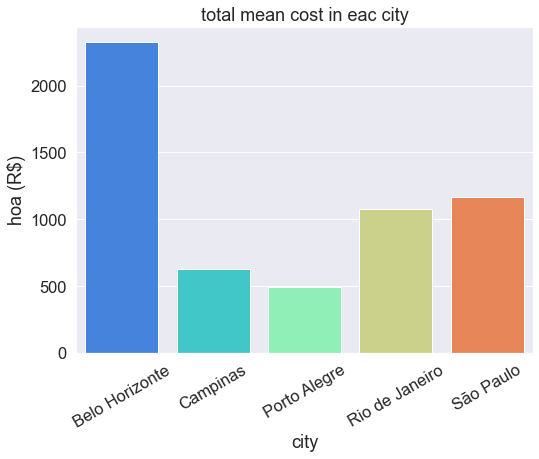

In [14]:
plt.figure(figsize=(18,6))
sb.set(font_scale=1.5)
plt.subplot(121)
plt.title("total mean cost in eac city")
plt.xticks(rotation=30)
sb.barplot(data=avg_cost,y="hoa (R$)",x="city",palette="rainbow")



In [15]:
median_cost=pd.DataFrame(df.groupby(by='city')['hoa (R$)'].median())

In [16]:
median_cost.reset_index(inplace=True)

In [17]:
median_cost

,city,hoa (R$)
0,Belo Horizonte,300.0
1,Campinas,485.0
2,Porto Alegre,350.0
3,Rio de Janeiro,800.0
4,São Paulo,665.0


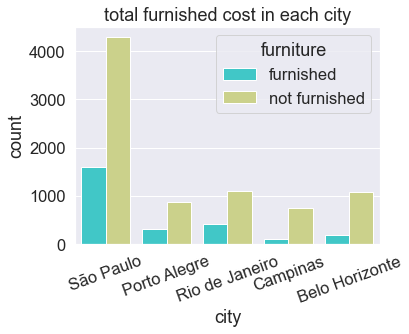

In [18]:
plt.figure(figsize=(12,4))
sb.set(font_scale=1.5)
plt.subplot(121)
plt.title("total furnished cost in each city")
plt.xticks(rotation=20)
sb.countplot(data=df,x='city',hue='furniture',palette="rainbow")
plt.show()

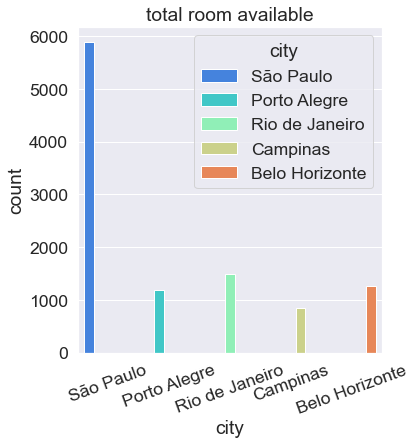

In [19]:
plt.figure(figsize=(12,6))
sb.set(font_scale=1.6)
plt.subplot(121)
plt.title("total room available")
plt.xticks(rotation=20)
sb.countplot(data=df,x='city',hue='city',palette="rainbow")
plt.show()

<AxesSubplot:title={'center':'bathroom'}, xlabel='count', ylabel='city'>

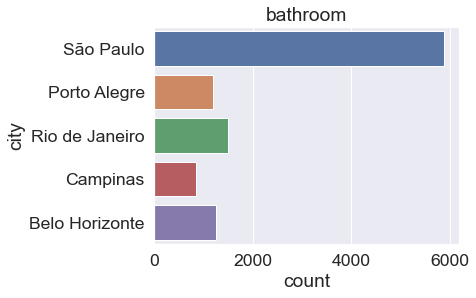

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("bathroom")
sb.countplot(data=df,y="city")

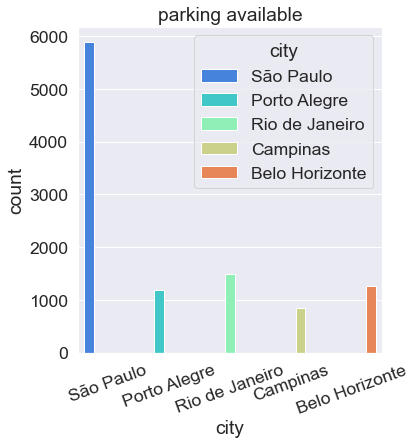

In [21]:
plt.figure(figsize=(12,6))
sb.set(font_scale=1.6)
plt.subplot(121)
plt.title("parking available")
plt.xticks(rotation=20)
sb.countplot(data=df,x='city',hue='city',palette="rainbow")
plt.show()

In [22]:
ct=pd.crosstab(index=df['city'],columns=df['total (R$)'],normalize='columns')

In [23]:
ct

total (R$),499,507,508,509,545,549,550,557,558,559,...,31580,32040,32180,32750,54430,95610,222100,233200,316900,1120000
city,,,,,,,,,,,,,,,,,,,,,
Belo Horizonte,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Campinas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Porto Alegre,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Rio de Janeiro,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
São Paulo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


In [24]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')